<a href="https://colab.research.google.com/github/bangkitPk/capstone-project-data-science/blob/main/Capstone_Project_Data_Scientist_Cakap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data Understanding

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/bangkitPk/capstone-project-data-science/main/garments_worker_productivity.csv')

In [20]:
df.shape

(1197, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [22]:
# Konversi kolom 'team' menjadi kategori
df['team'] = df['team'].astype('category')

In [23]:
num_columns=['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
cat_columns=['team', 'quarter', 'department', 'day']

In [24]:
# Describe untuk kolom numerik
df[num_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000
actual_productivity,1197.0,0.735091,0.174488,0.233705,0.650307,0.773333,0.850253,1.120437


In [25]:
# Describe untuk kolom kategorik
df[cat_columns].describe().transpose()

,count,unique,top,freq
team,1197,12,2,109
quarter,1197,5,Quarter1,360
department,1197,3,sweing,691
day,1197,6,Wednesday,208


In [26]:
df['date'] = pd.to_datetime(df['date'])

## Visualisasi Distribusi Kolom Numerik

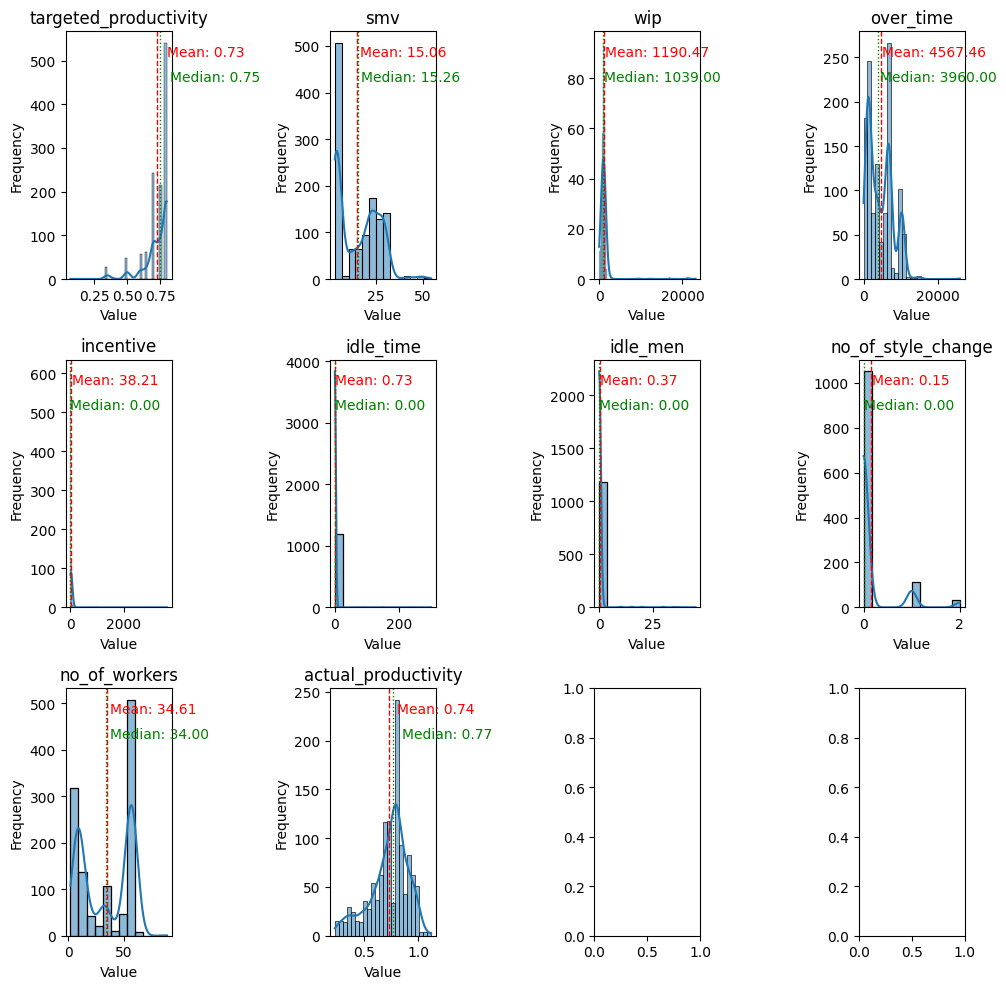

In [27]:
# Cek distribusi variabel numerik dengan histplot
fig, axes = plt.subplots(3, 4, figsize=(10, 10))
for i, col in enumerate(num_columns):
    row_index = i // 4
    col_index = i % 4
    sns.histplot(df[col], ax=axes[row_index, col_index], kde=True)
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('Value')
    axes[row_index, col_index].set_ylabel('Frequency')

    mean_value = df[col].mean()
    median_value = df[col].median()

    # Add mean line
    axes[row_index, col_index].axvline(mean_value, color='r', linestyle='dashed', linewidth=1)
    axes[row_index, col_index].text(mean_value * 1.1, axes[row_index, col_index].get_ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', color='r')

    # Add median line
    axes[row_index, col_index].axvline(median_value, color='g', linestyle='dotted', linewidth=1)
    axes[row_index, col_index].text(median_value * 1.1, axes[row_index, col_index].get_ylim()[1] * 0.8, f'Median: {median_value:.2f}', color='g')

plt.tight_layout()
plt.show()

## Visualisai Box Plot Kolom Numerik

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_b

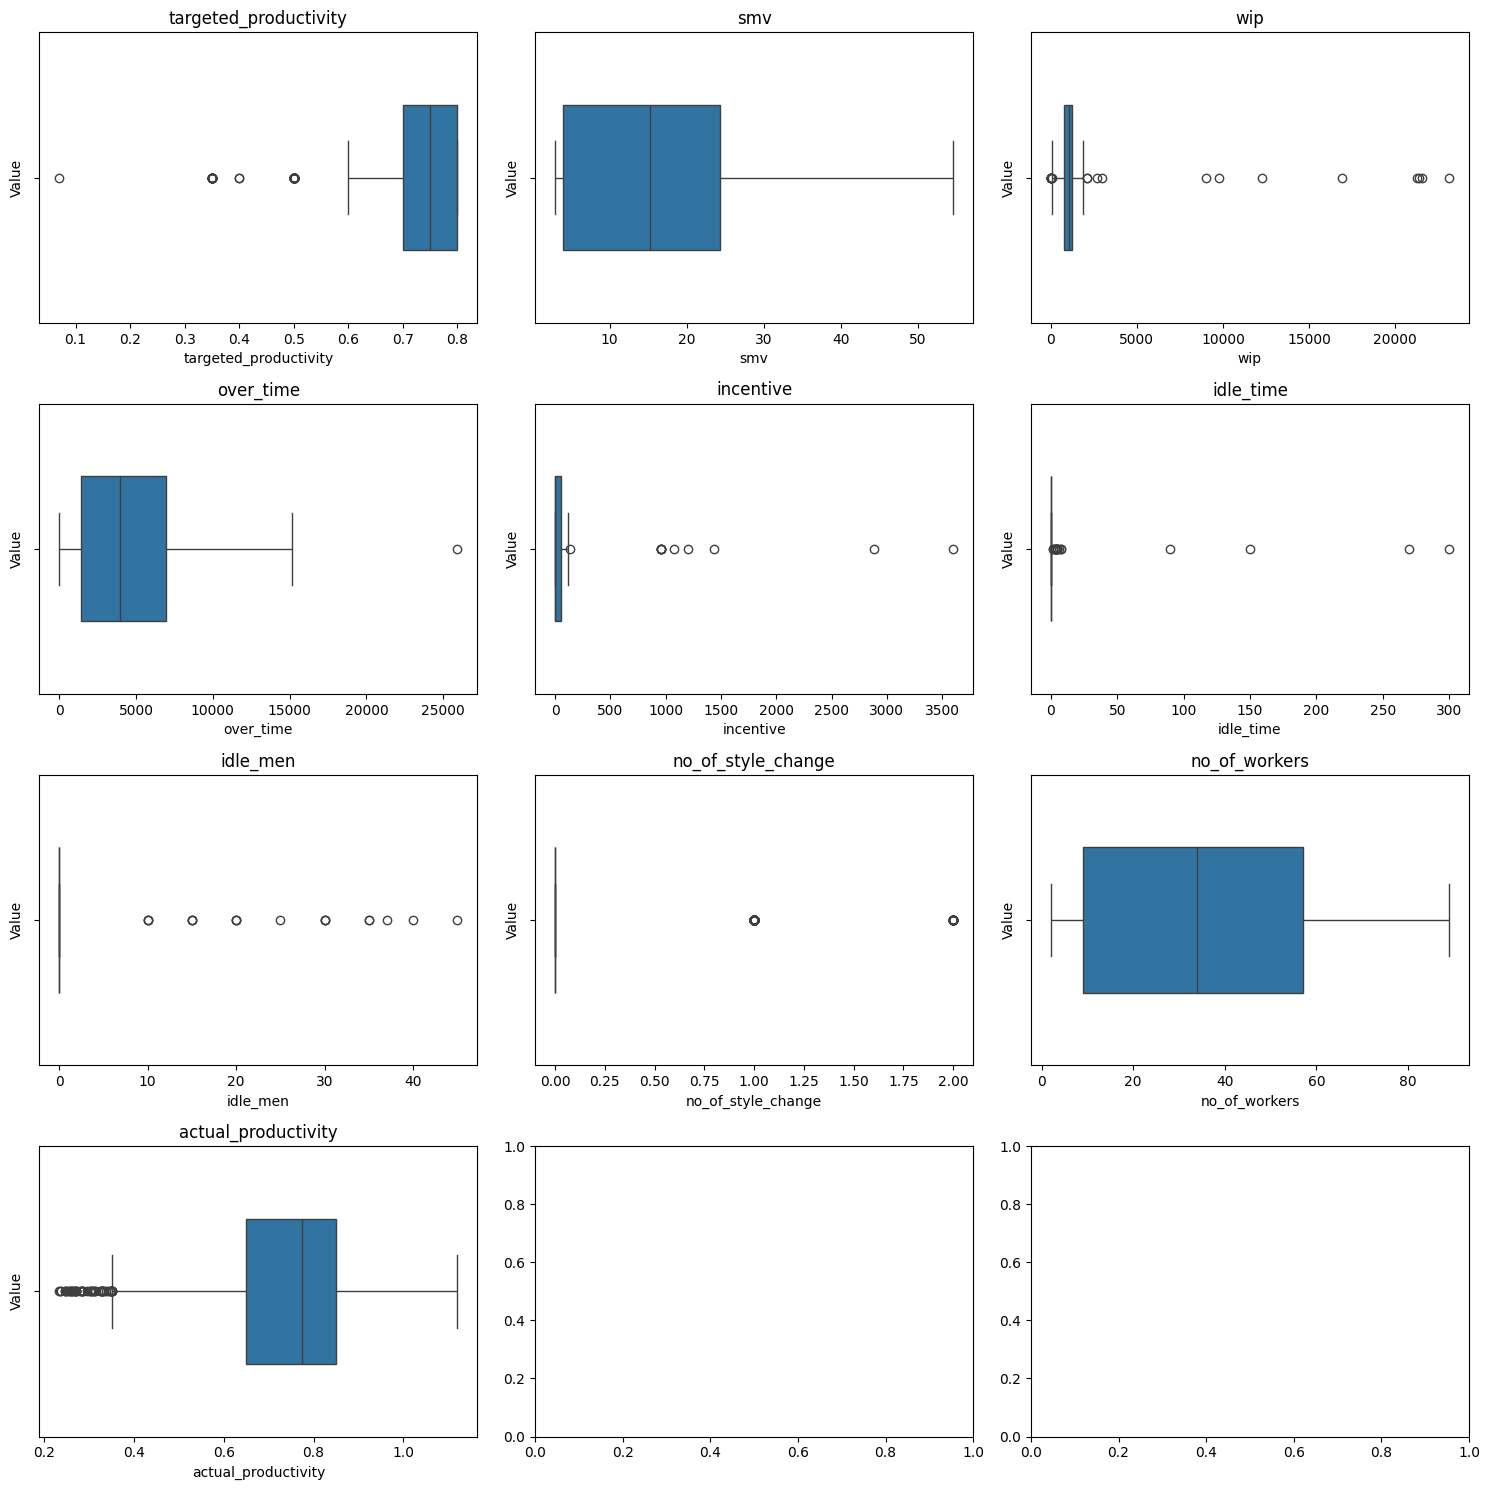

In [28]:
# Cek distribusi variabel numerik dengan boxplot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
for i, col in enumerate(num_columns):
    row_index = i // 3
    col_index = i % 3
    sns.boxplot(x=df[col], ax=axes[row_index, col_index], orient='v', width=0.5)
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_ylabel('Value')

plt.tight_layout()
plt.show()

## Visualisasi Scatter Plot Kolom Prediktor dengan Kolom actual_productivity

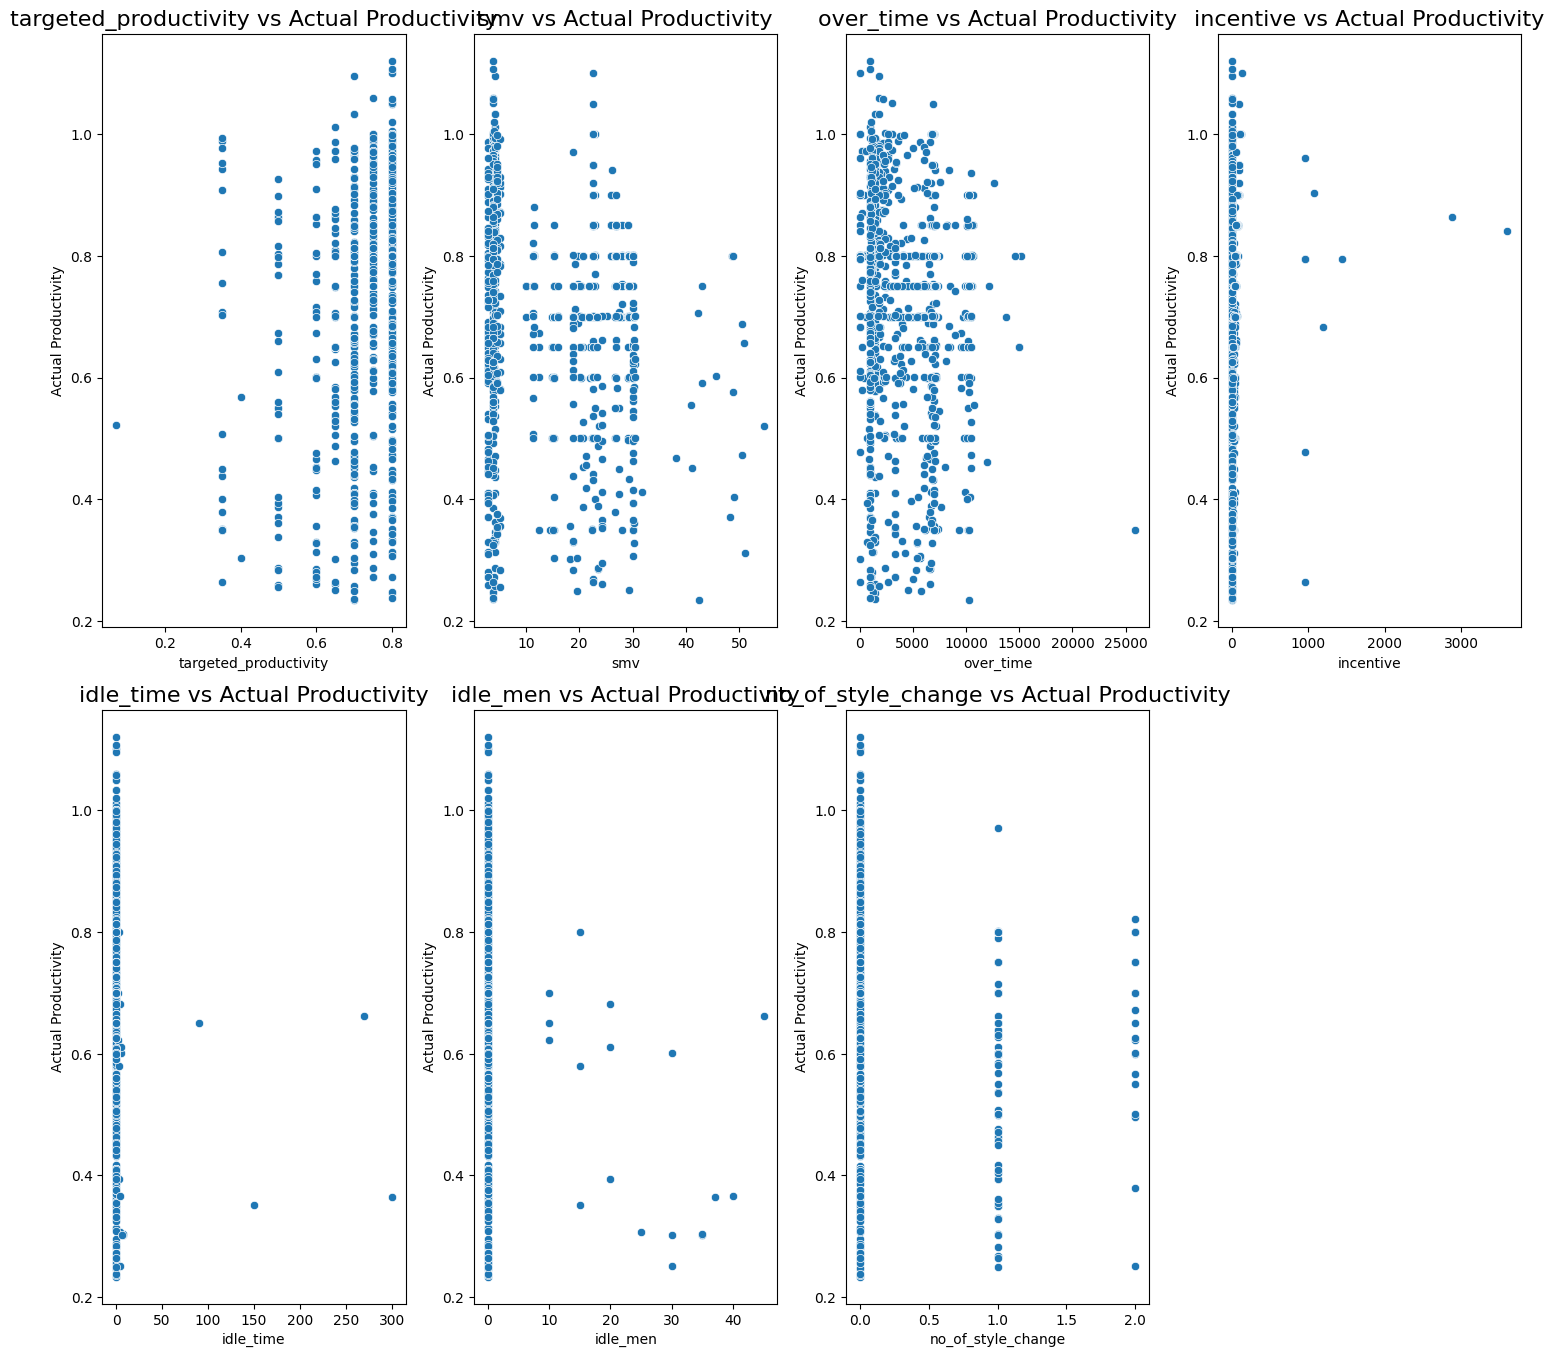

In [96]:
fig, axes = plt.subplots(3, 4, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over numeric columns and create scatter plots
for i, col in enumerate(num_columns):
    if col != 'actual_productivity':  # Skip the target variable itself
        sns.scatterplot(x=df[col], y=df['actual_productivity'], ax=axes[i])
        axes[i].set_title(f'{col} vs Actual Productivity', fontsize=16)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Actual Productivity')

# Hide any unused subplots (in case there are more slots than columns to plot)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Cleansing

In [30]:
df_2 = df.copy()

In [31]:
# terdapat dua departemen finishing karena ada spasi di akhir salah satu kata finishing
# Hapus spasi pada kata "finishing " di kolom department
df_2['department'] = df_2['department'].str.strip()

In [32]:
# perbaiki penulisan departemen sewing

df_2['department'] = df_2['department'].replace({'sweing': 'sewing'})

In [33]:
# ubah kuartal 5 menjadi kuartal 4
df_2['quarter'] = df_2['quarter'].replace('Quarter5', 'Quarter4')

In [34]:
# cek perbaikan
for column in cat_columns:
  print(column)
  print(df[column].unique())
  print('\n')

team
[8, 1, 11, 12, 6, ..., 3, 9, 10, 5, 4]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]


quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']




In [35]:
# Buang baris yang memiliki nilai actual_productivity lebih dari 1
df_2 = df_2[df_2['actual_productivity'] <= 1]

In [36]:
df_2.shape

(1160, 15)

In [37]:
df_2.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

# Visualisasi Data Lebih Dalam


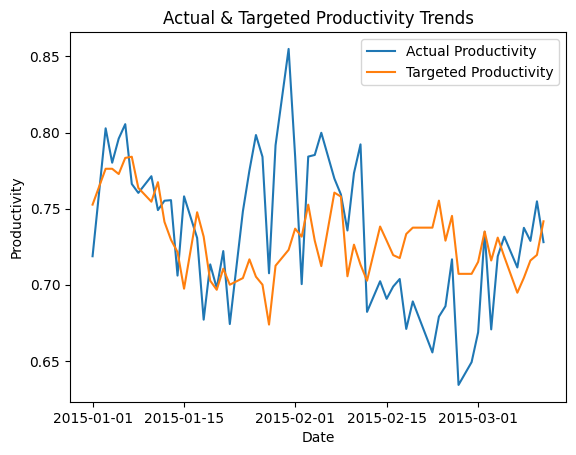

In [38]:
# Plot the actual productivity
sns.lineplot(data=df, x="date", y="actual_productivity", errorbar=None, label="Actual Productivity")
# Plot the targeted productivity
sns.lineplot(data=df, x="date", y="targeted_productivity", errorbar=None, label="Targeted Productivity")

plt.xlabel('Date')
plt.ylabel('Productivity')
plt.title('Actual & Targeted Productivity Trends')
plt.legend()
plt.show()

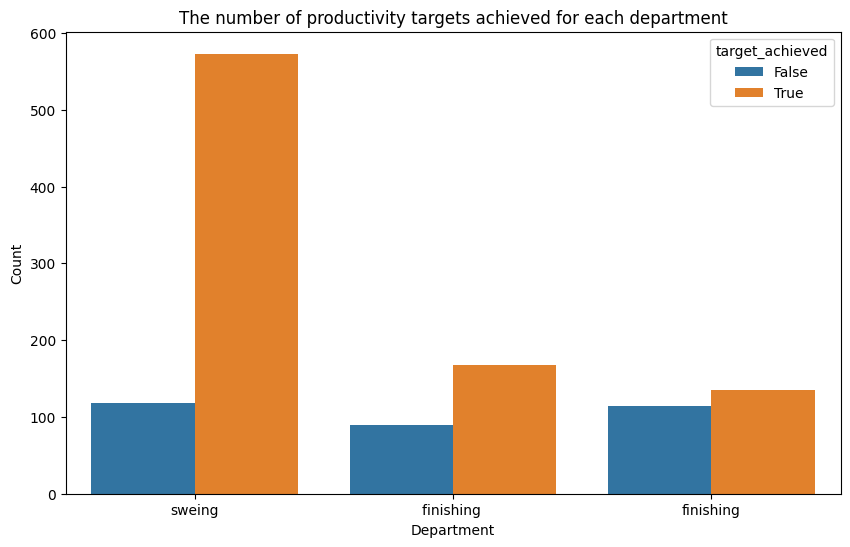

In [39]:
df_2 = df.copy()
df_2['target_achieved'] = df_2['actual_productivity'] >= df_2['targeted_productivity']

plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='target_achieved', data=df_2)
plt.title('The number of productivity targets achieved for each department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

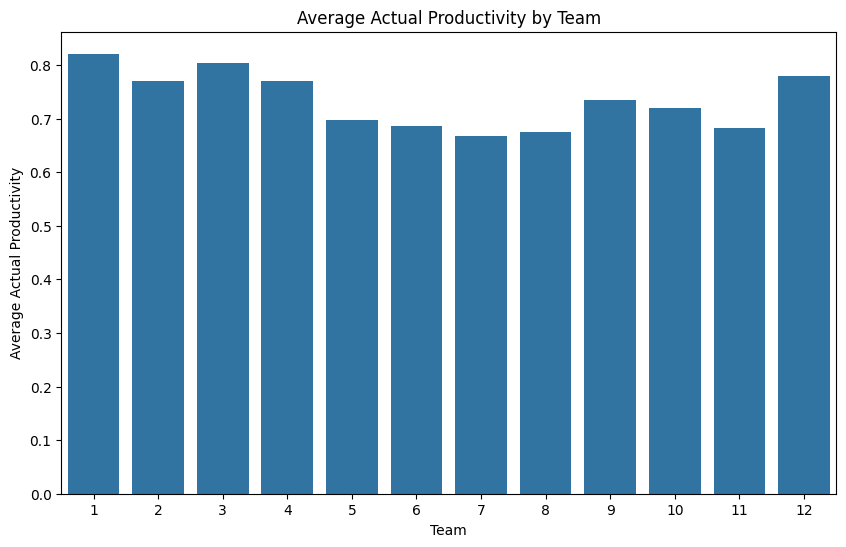

In [40]:
# Menghitung produktivitas aktual rata-rata untuk setiap tim
team_avg_productivity = df_2.groupby('team')['actual_productivity'].mean().reset_index()

# Mengurutkan tim berdasarkan produktivitas aktual rata-rata
team_avg_productivity = team_avg_productivity.sort_values(by='actual_productivity', ascending=False)

# Visualisasi menggunakan barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='team', y='actual_productivity', data=team_avg_productivity, legend=False)
plt.title('Average Actual Productivity by Team')
plt.xlabel('Team')
plt.ylabel('Average Actual Productivity')
plt.show()

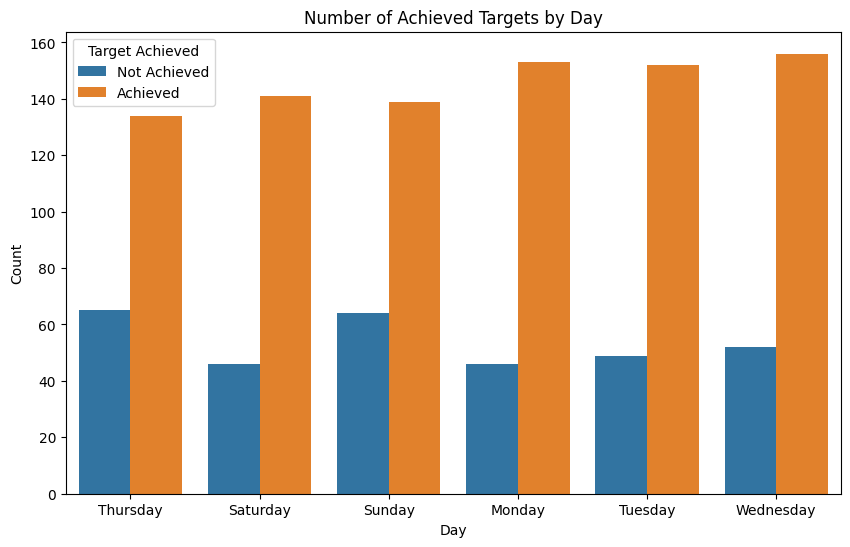

In [41]:
# Visualisasi untuk melihat jumlah produktivitas yang mencapai target untuk setiap hari
plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='target_achieved', data=df_2)
plt.title('Number of Achieved Targets by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Target Achieved', labels=['Not Achieved', 'Achieved'])
plt.show()

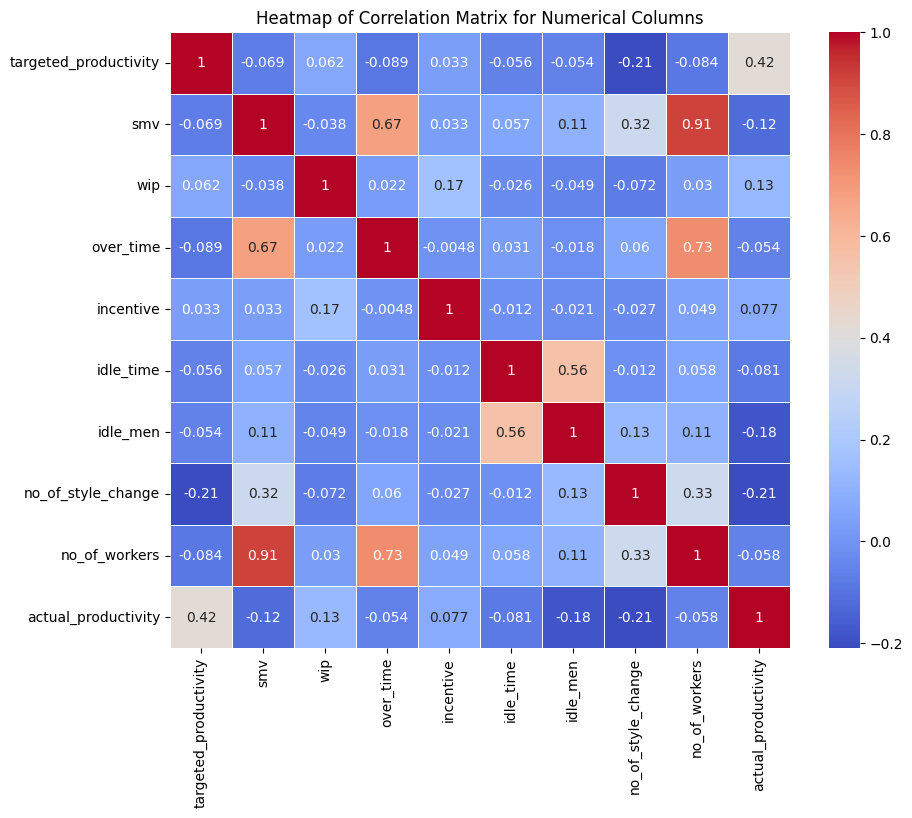

In [42]:
# membuat dataframe untuk kolom numerik
numerical_df = df_2[num_columns]

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Columns')
plt.show()

# Feature Engineering

## Seleksi Fitur

In [43]:
# Hapus kolom date
df_2.drop('date', axis=1, inplace=True)

# Hapus kolom no_of_workers
df_2.drop('no_of_workers', axis=1, inplace=True)

# Hapus kolom wip
df_2.drop('wip', axis=1, inplace=True)

In [44]:
df_2.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'actual_productivity', 'target_achieved'],
      dtype='object')

## Pembuatan Kolom Baru

In [45]:
df_2['target_achieved'] = df_2['target_achieved'].astype(int)

In [46]:
df_2.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,actual_productivity,target_achieved
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,0.886500,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,0.800570,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,0.800570,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,0.800382,1


## Imbalance Case

In [47]:
# cek kelas imbalance
df_2['target_achieved'].value_counts()

target_achieved
1    875
0    322
Name: count, dtype: int64

## Split Dataset

In [48]:
# Pisahkan fitur dan target
X = df_2.drop(['target_achieved', 'actual_productivity'], axis=1)
y = df_2['target_achieved']

In [49]:
X.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0


In [50]:
num_columns_2=['targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change']

## Encoding Kolom Kategorik

In [51]:
df_encoded = pd.get_dummies(df_2, columns=cat_columns)

In [52]:
df_encoded = df_encoded.drop(['actual_productivity'],axis=1)

In [56]:
bool_columns = df_encoded.select_dtypes(include='bool').columns

In [57]:
bool_columns

Index(['team_1', 'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7',
       'team_8', 'team_9', 'team_10', 'team_11', 'team_12', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_finishing ',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [58]:
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

In [53]:
df_encoded.shape

(1197, 34)

In [59]:
df_encoded.head()

,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,target_achieved,team_1,team_2,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0.80,26.16,7080,98,0.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.75,3.94,960,0,0.0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0.80,11.41,3660,50,0.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.80,11.41,3660,50,0.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0.80,25.90,1920,50,0.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


## Scaling Kolom Numerik

In [60]:
num_columns = ['targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change']
numeric_data = df_encoded[num_columns]

# Scaling data numerik
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

df_scaled = pd.DataFrame(scaled_numeric_data, columns=num_columns)
df_scaled.index = df_encoded.index

df_final = pd.concat([df_scaled, df_encoded.drop(columns=num_columns)], axis=1)

# Split data menjadi train dan test
X = df_final.drop(columns=['target_achieved'])
y = df_final['target_achieved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.head()

,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,team_1,team_2,team_3,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
1189,-0.302835,1.409482,0.678892,-0.051279,-0.057473,-0.113005,1.986639,0,0,0,...,0,0,0,1,0,0,0,0,0,1
575,0.208151,-1.016778,-0.683349,-0.238643,-0.057473,-0.113005,-0.351617,1,0,0,...,0,0,1,0,1,0,0,0,0,0
76,0.208151,-1.111853,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,0,0,0,...,0,0,1,0,1,0,0,0,0,0
731,-0.302835,-0.997580,-0.826743,-0.238643,-0.057473,-0.113005,-0.351617,0,0,0,...,0,1,0,0,0,0,0,1,0,0
138,0.719137,-0.315594,3.152436,0.154822,-0.057473,-0.113005,-0.351617,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [62]:
y_train.head()

1189    1
575     0
76      1
731     1
138     1
Name: target_achieved, dtype: int64

In [63]:
X_train.shape

(957, 33)

In [64]:
X_test.shape

(240, 33)

# Modeling

## Pemodelan Awal

In [66]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Achieved', 'Achieved'], yticklabels=['Not Achieved', 'Achieved'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

In [67]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.54      0.30      0.39        63
           1       0.79      0.91      0.84       177

    accuracy                           0.75       240
   macro avg       0.66      0.61      0.62       240
weighted avg       0.72      0.75      0.72       240



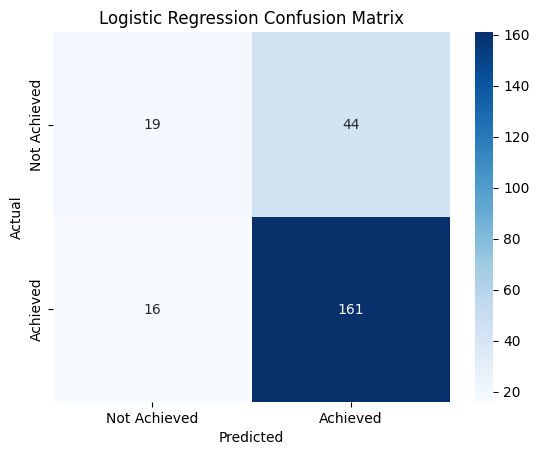

In [68]:
print('Logistic Regression:')
print(classification_report(y_test, y_test_pred_log_reg))
plot_confusion_matrix(y_test, y_test_pred_log_reg, 'Logistic Regression Confusion Matrix')

In [69]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_train_pred_decision_tree = decision_tree.predict(X_train)
y_test_pred_decision_tree = decision_tree.predict(X_test)

Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        63
           1       0.88      0.89      0.88       177

    accuracy                           0.82       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.82      0.82      0.82       240



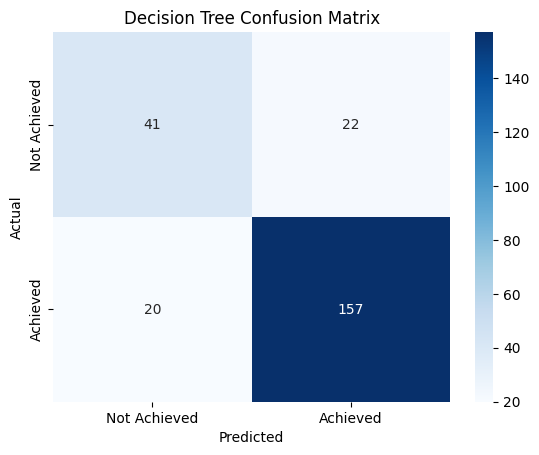

In [70]:
print('Decision Tree:')
print(classification_report(y_test, y_test_pred_decision_tree))
plot_confusion_matrix(y_test, y_test_pred_decision_tree, 'Decision Tree Confusion Matrix')

In [71]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_train_pred_random_forest = random_forest.predict(X_train)
y_test_pred_random_forest = random_forest.predict(X_test)

Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.52      0.61        63
           1       0.85      0.93      0.88       177

    accuracy                           0.82       240
   macro avg       0.78      0.73      0.74       240
weighted avg       0.81      0.82      0.81       240



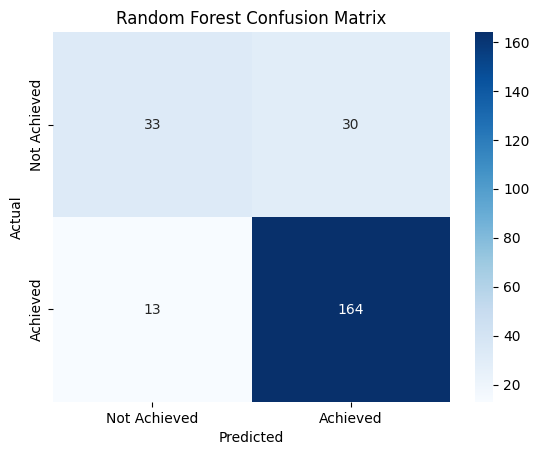

In [72]:
print('Random Forest:')
print(classification_report(y_test, y_test_pred_random_forest))
plot_confusion_matrix(y_test, y_test_pred_random_forest, 'Random Forest Confusion Matrix')

In [73]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.73      0.17      0.28        63
           1       0.77      0.98      0.86       177

    accuracy                           0.77       240
   macro avg       0.75      0.58      0.57       240
weighted avg       0.76      0.77      0.71       240



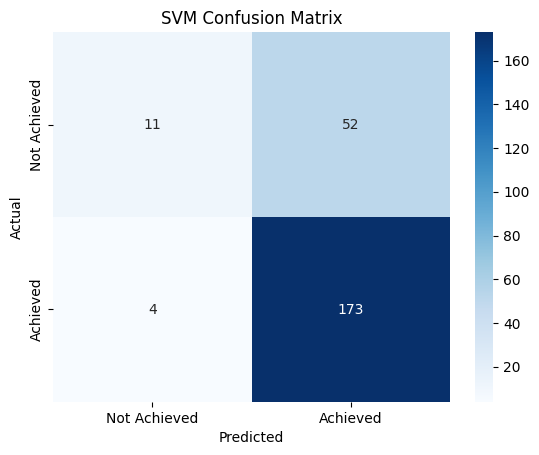

In [74]:
print('Support Vector Machine (SVM):')
print(classification_report(y_test, y_test_pred_svm))
plot_confusion_matrix(y_test, y_test_pred_svm, 'SVM Confusion Matrix')

In [75]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_train_pred_mlp = mlp.predict(X_train)
y_test_pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-layer Perceptron (MLP):
              precision    recall  f1-score   support

           0       0.68      0.51      0.58        63
           1       0.84      0.92      0.88       177

    accuracy                           0.81       240
   macro avg       0.76      0.71      0.73       240
weighted avg       0.80      0.81      0.80       240



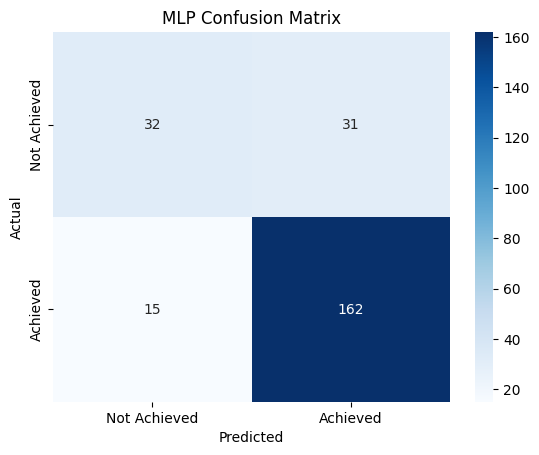

In [76]:
print('Multi-layer Perceptron (MLP):')
print(classification_report(y_test, y_test_pred_mlp))
plot_confusion_matrix(y_test, y_test_pred_mlp, 'MLP Confusion Matrix')

## Resampling SMOTE

In [77]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [78]:
y_train_resampled.value_counts()

target_achieved
1    698
0    698
Name: count, dtype: int64

## Hyperparameter Tuning

Logistic Regression

In [79]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Tentukan grid parameter yang akan di-tune
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Lakukan training model dengan data yang sudah di-resample
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# Print parameter terbaik dan nilai f1-score terbaik
print("Best Parameters:", grid_search_logreg.best_params_)
print("Best CV F1-score:", grid_search_logreg.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 100, 'penalty': 'l2'}
Best CV F1-score: 0.8344573107416087


Logistic Regression After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.53      0.32      0.40        63
           1       0.79      0.90      0.84       177

    accuracy                           0.75       240
   macro avg       0.66      0.61      0.62       240
weighted avg       0.72      0.75      0.72       240



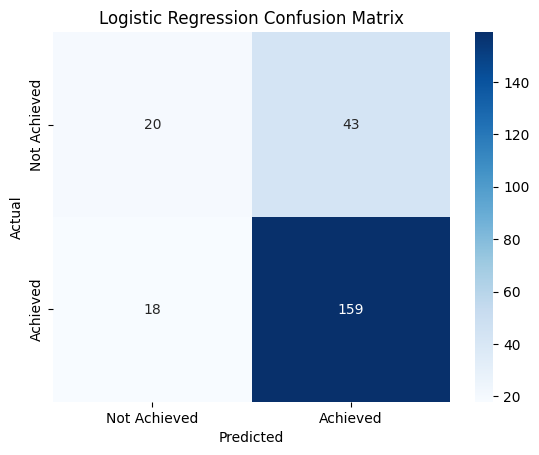

In [80]:
best_logreg = LogisticRegression(C=100, penalty='l2', max_iter=1000, random_state=42)
best_logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = best_logreg.predict(X_test)
print('Logistic Regression After Hyperparameter Tuning:')
print(classification_report(y_test, y_pred_logreg))
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression Confusion Matrix')

Decision Tree

In [81]:
dt = DecisionTreeClassifier(random_state=42)

# Tentukan grid parameter yang akan di-tune
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search_dt = GridSearchCV(dt, param_grid_dt, scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Lakukan training model dengan data yang sudah di-resample
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Print parameter terbaik dan nilai f1-score terbaik
print("Best Parameters:", grid_search_dt.best_params_)
print("Best CV F1-score:", grid_search_dt.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV F1-score: 0.8128294315098208


Decision Tree After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.60      0.63      0.62        63
           1       0.87      0.85      0.86       177

    accuracy                           0.79       240
   macro avg       0.73      0.74      0.74       240
weighted avg       0.80      0.79      0.79       240



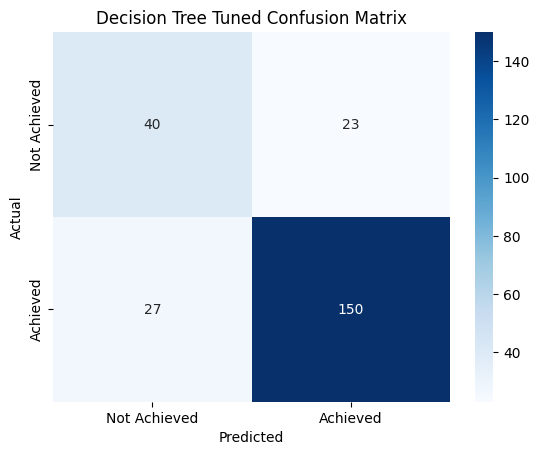

In [82]:
best_dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)
best_dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = best_dt.predict(X_test)
print('Decision Tree After Hyperparameter Tuning:')
print(classification_report(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Tuned Confusion Matrix')

Random Forest

In [83]:
# Definisikan model Random Forest
rf = RandomForestClassifier(random_state=42)

# Tentukan grid parameter yang akan di-tune
param_grid_rf = {
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50, 70, 90],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 5],
    'n_estimators': [20,40,60,80,100]
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5)

# Lakukan training model dengan data yang sudah di-resample
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Print parameter terbaik dan nilai f1-score terbaik
print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV F1-score:", grid_search_rf.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}
Best CV F1-score: 0.8667043294553279


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        63
           1       0.91      0.89      0.90       177

    accuracy                           0.85       240
   macro avg       0.81      0.82      0.81       240
weighted avg       0.86      0.85      0.86       240



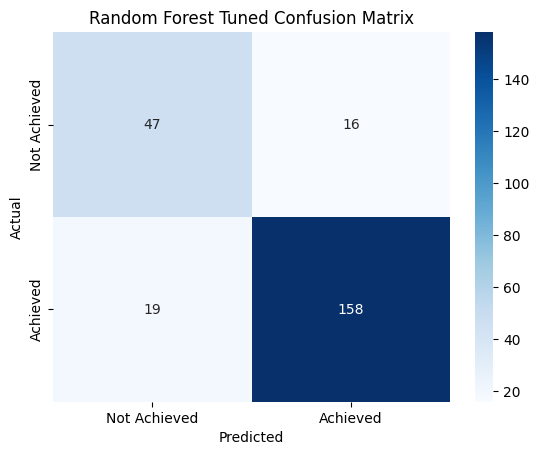

In [84]:
best_rf = RandomForestClassifier(bootstrap= False, max_depth= 30, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators=80, random_state=42)
best_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = best_rf.predict(X_test)
print('Random Forest After Hyperparameter Tuning:')
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Tuned Confusion Matrix')

SVM

In [85]:
# Definisikan model SVM
svm = SVC(random_state=42)

# Tentukan grid parameter yang akan di-tune
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search_svm = GridSearchCV(svm, param_grid_svm, scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Lakukan training model dengan data yang sudah di-resample
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Print parameter terbaik dan nilai f1-score terbaik
print("Best Parameters:", grid_search_svm.best_params_)
print("Best CV F1-score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV F1-score: 0.8562457269017724


SVC After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.70      0.60      0.65        63
           1       0.87      0.91      0.89       177

    accuracy                           0.83       240
   macro avg       0.78      0.76      0.77       240
weighted avg       0.82      0.83      0.82       240



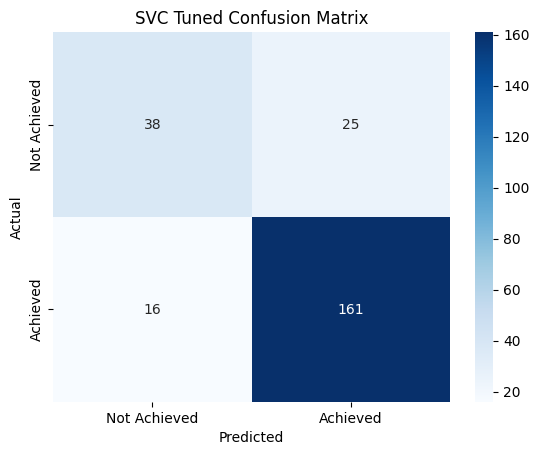

In [86]:
best_SVC = SVC(C=10, gamma='scale', kernel='rbf')
best_SVC.fit(X_train_resampled, y_train_resampled)
y_pred_SVC = best_SVC.predict(X_test)
print('SVC After Hyperparameter Tuning:')
print(classification_report(y_test, y_pred_SVC))
plot_confusion_matrix(y_test, y_pred_SVC, 'SVC Tuned Confusion Matrix')

MLP

In [87]:
# Definisikan model MLP
mlp = MLPClassifier(random_state=42)

# Tentukan grid parameter yang akan di-tune
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Lakukan training model dengan data yang sudah di-resample
grid_search_mlp.fit(X_train_resampled, y_train_resampled)

# Print parameter terbaik dan nilai f1-score terbaik
print("Best Parameters:", grid_search_mlp.best_params_)
print("Best CV F1-score:", grid_search_mlp.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best CV F1-score: 0.854303452318747


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        63
           1       0.86      0.93      0.89       177

    accuracy                           0.84       240
   macro avg       0.80      0.75      0.77       240
weighted avg       0.83      0.84      0.83       240



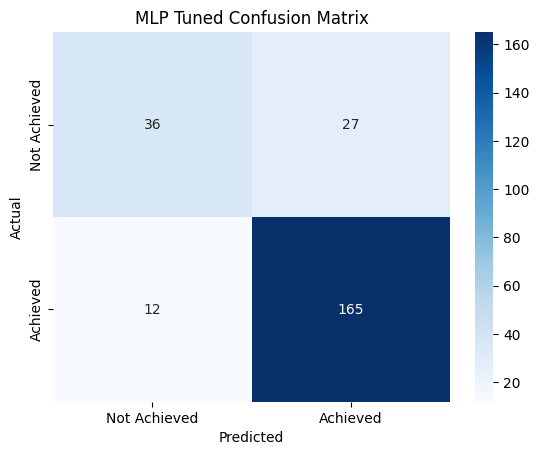

In [88]:
best_MLP = MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate='constant', solver='adam')
best_MLP.fit(X_train_resampled, y_train_resampled)
y_pred_MLP = best_MLP.predict(X_test)
print('MLP After Hyperparameter Tuning:')
print(classification_report(y_test, y_pred_MLP))
plot_confusion_matrix(y_test, y_pred_MLP, 'MLP Tuned Confusion Matrix')

## Evaluasi Model

In [89]:
f1_logreg = f1_score(y_test, y_pred_logreg)
print(f1_logreg)

0.8390501319261214


In [90]:
f1_dt = f1_score(y_test, y_pred_dt)
print(f1_dt)

0.8571428571428572


In [91]:
f1_rf = f1_score(y_test, y_pred_rf)
print(f1_rf)

0.9002849002849003


In [92]:
f1_svc = f1_score(y_test, y_pred_SVC)
print(f1_svc)

0.887052341597796


In [93]:
f1_mlp = f1_score(y_test, y_pred_MLP)
print(f1_mlp)

0.8943089430894309


In [97]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'MLP'],
    'F1-score': [0.8390501319261214, 0.8571428571428572, 0.9002849002849003, 0.887052341597796, 0.8943089430894309]  # Contoh nilai, ganti dengan nilai F1-score aktual dari kelas 1
}

# Membuat DataFrame
df_f1_scores = pd.DataFrame(data)
df_f1_scores

,Model,F1-score
0,Logistic Regression,0.839050
1,Decision Tree,0.857143
2,Random Forest,0.900285
3,SVC,0.887052
4,MLP,0.894309


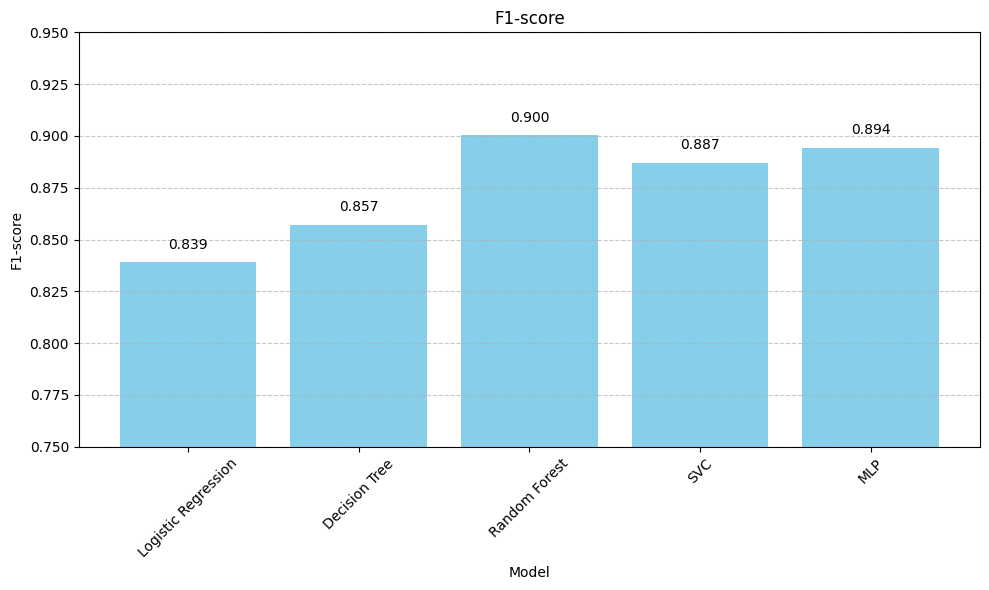

In [100]:
# Plotting bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_f1_scores['Model'], df_f1_scores['F1-score'], color='skyblue')
plt.title('F1-score')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.ylim(0.75, 0.95)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai F1-score di atas bar
for i, score in enumerate(df_f1_scores['F1-score']):
    plt.text(i, score + 0.005, f'{score:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()